In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the Iris dataset from CSV file
df = pd.read_csv('Iris.csv')


In [ ]:
# Display the first five rows of the dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Encode the categorical target variable 'Species' to numeric values
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
# Display the updated dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
# Print the first five rows to verify encoding
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [ ]:
# Drop the 'Id' column as it is not useful for modeling
df = df.drop(columns=['Id'])

In [ ]:
# Select features (first two columns) and target (Species)
X = df.iloc[:, 0:2]  # Features: SepalLengthCm and SepalWidthCm
y = df.iloc[:, 4]    # Target: Species

# Display the first five rows of features and target
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

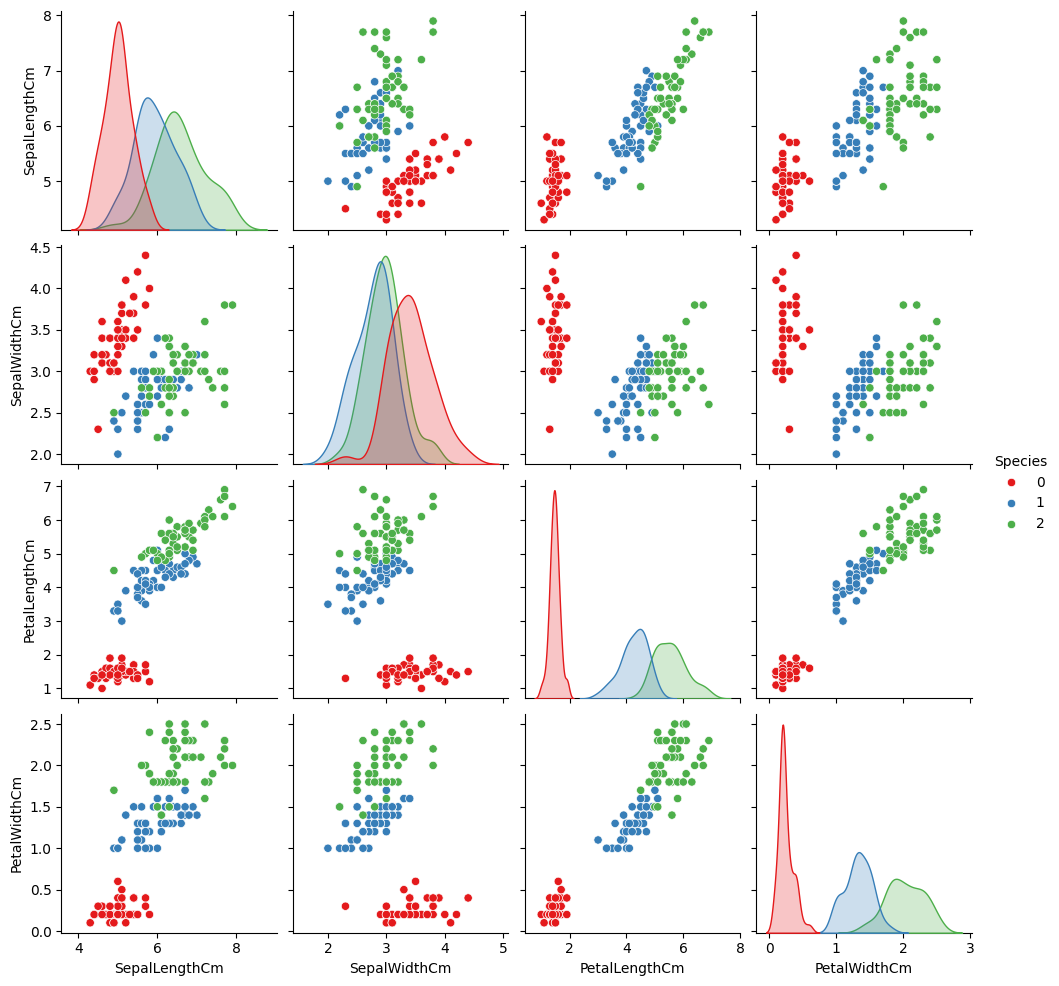

In [ ]:
# Visualize the pairwise relationships in the dataset
sns.pairplot(df, hue='Species', palette='Set1')

In [ ]:
# Initialize individual classifiers
m1 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
m2 = LogisticRegression(random_state=42)
m3 = DecisionTreeClassifier(random_state=42)
m4 = SVC(probability=True, random_state=42)

# Create a Voting Classifier ensemble
voting_clf = VotingClassifier(
    estimators=[('rf', m1), ('LR', m2), ('dtc', m3), ('svc', m4)],
    voting='hard'
)

# Fit the ensemble model on the training data
voting_clf.fit(X_train, y_train)


,estimators,"[('rf', ...), ('LR', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [ ]:
# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
score = voting_clf.score(X_test, y_test)
acc = accuracy_score(y_test, y_pred)

print(f"Voting Classifier Test Score: {score:.2f}")
print(f"Accuracy Score: {acc:.2f}")

Voting Classifier Test Score: 0.80
Accuracy Score: 0.80
